# Customer Purchase Data Analysis
This notebook performs EDA and analysis as per the assignment requirements.

In [ ]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ad474f93147e569215d7620632d5a9e46112e1309df90dc81e96710cd72601ef
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Load your dataset
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('Customer_Purchase_Data.csv')

Saving Customer_Purchase_Data.csv to Customer_Purchase_Data.csv


## Task 1: Basic Statistics & Summary

In [ ]:
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
print("\nData types after conversion:\n", df.dtypes)

              Age  Annual_Income  Spending_Score  Purchase_Amount  \
count  500.000000     500.000000      500.000000       500.000000   
mean    44.220000   85364.862000       50.472000       503.094060   
std     15.036082   39127.186586       29.724608       286.513893   
min     18.000000   20077.000000        0.000000        14.890000   
25%     32.000000   50418.500000       25.000000       243.342500   
50%     45.000000   87475.000000       49.500000       505.720000   
75%     57.000000  120223.500000       76.250000       733.572500   
max     69.000000  149948.000000      100.000000       999.420000   

       Transaction_Frequency  
count             500.000000  
mean               25.338000  
std                13.717438  
min                 1.000000  
25%                14.000000  
50%                24.000000  
75%                37.000000  
max                49.000000  

Missing values:
 Customer_ID              0
Age                      0
Gender                   0


## Task 2: Correlation Analysis

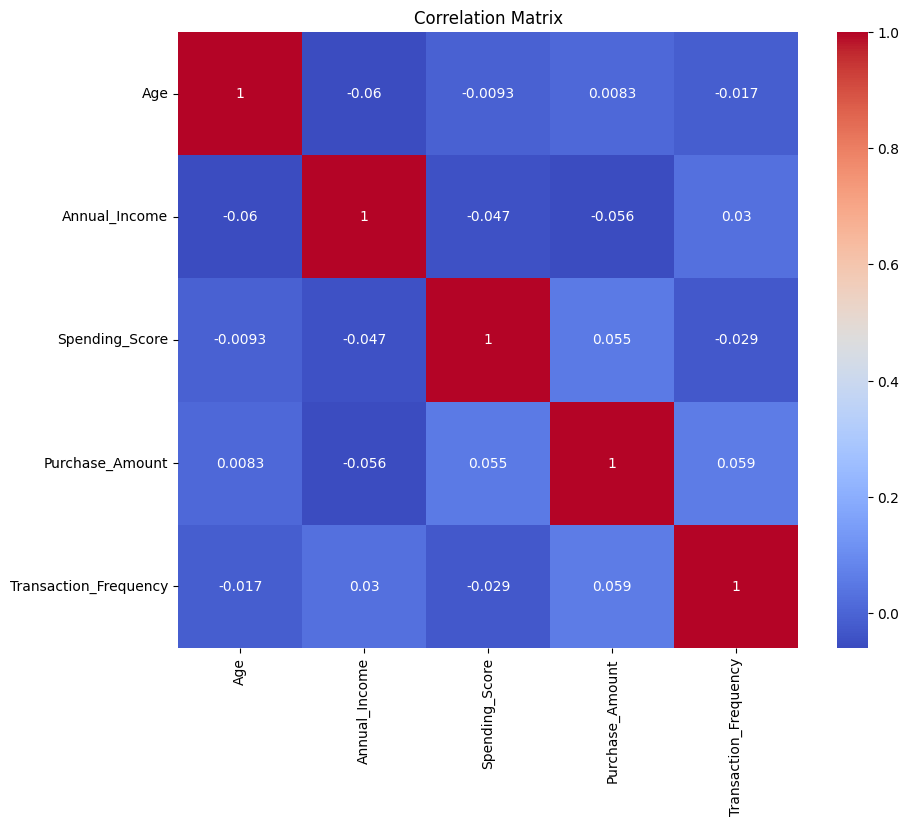

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Task 3: Z-Score for Outlier Detection

In [ ]:
df['Z_Purchase_Amount'] = stats.zscore(df['Purchase_Amount'])
outliers_z = df[np.abs(df['Z_Purchase_Amount']) > 3]
print("Z-Score Outliers:\n", outliers_z)

Z-Score Outliers:
 Empty DataFrame
Columns: [Customer_ID, Age, Gender, Annual_Income, Spending_Score, Purchase_Amount, Transaction_Frequency, Membership_Status, Category_Purchased, Purchase_Date, Z_Purchase_Amount]
Index: []


## Task 4: Encoding Categorical Variables

In [ ]:
le_gender = LabelEncoder()
df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])

le_membership = LabelEncoder()
df['Membership_Encoded'] = le_membership.fit_transform(df['Membership_Status'])

df = pd.get_dummies(df, columns=['Category_Purchased'], drop_first=True)

## Task 5: IQR and Outlier Detection

In [ ]:
for column in ['Annual_Income', 'Spending_Score']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Outliers in {column}:\n", outliers[[column]])

Outliers in Annual_Income:
 Empty DataFrame
Columns: [Annual_Income]
Index: []
Outliers in Spending_Score:
 Empty DataFrame
Columns: [Spending_Score]
Index: []


## Task 6: Data Distribution & Visualization

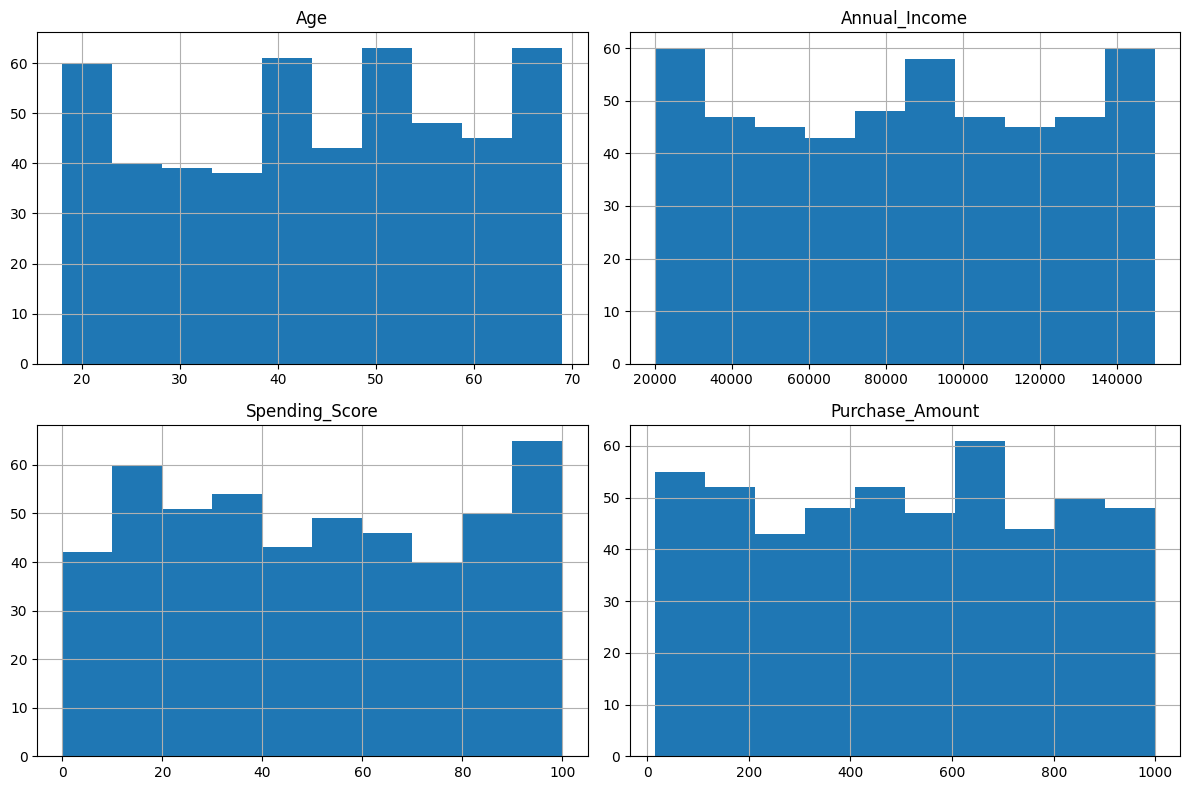

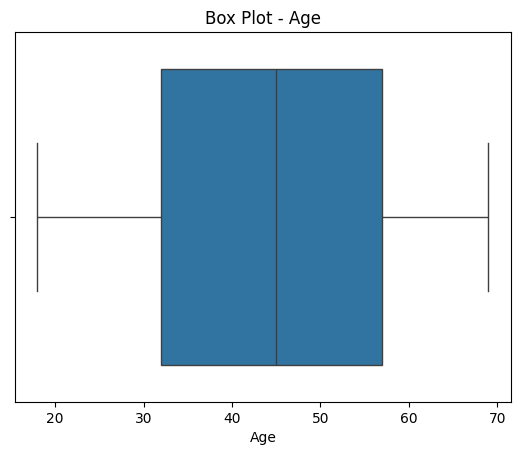

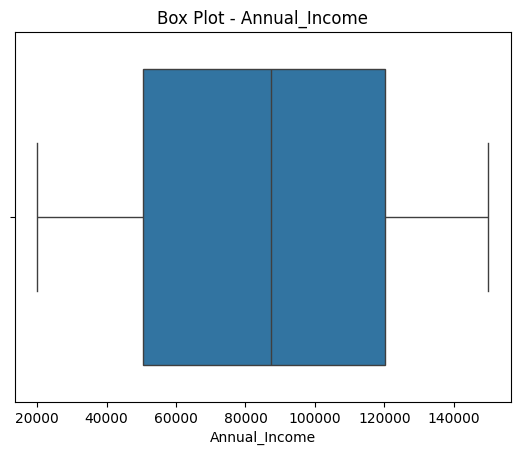

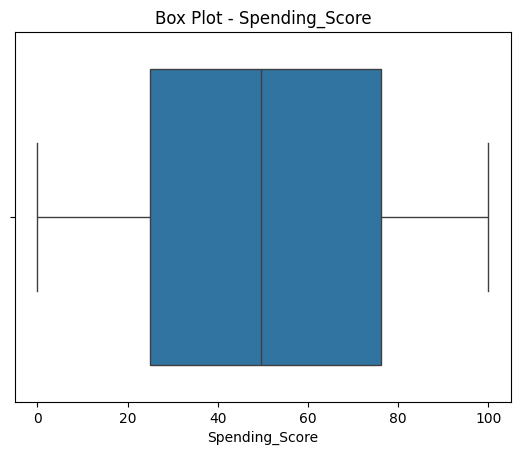

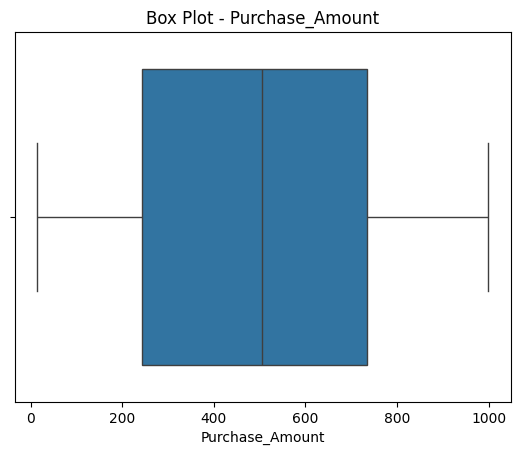

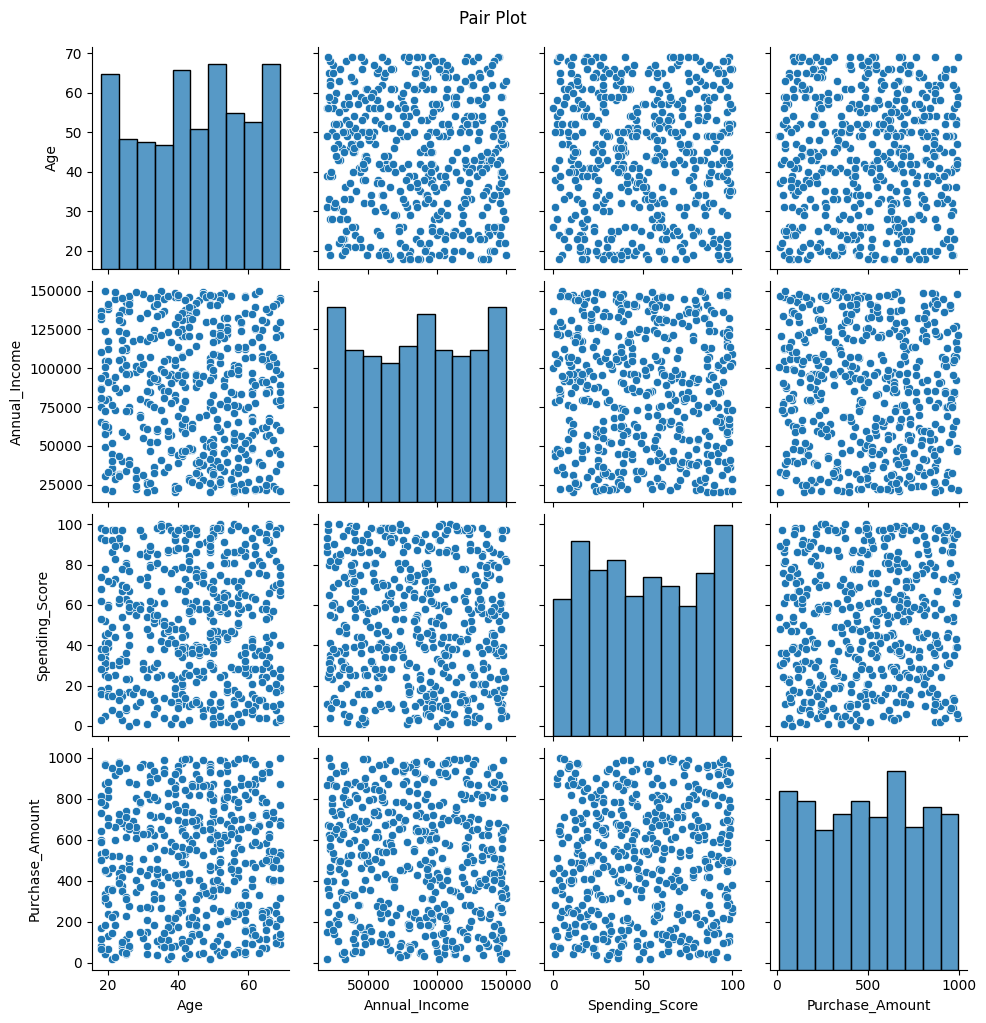

In [ ]:
df[['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Amount']].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

for column in ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Amount']:
    sns.boxplot(x=column, data=df)
    plt.title(f"Box Plot - {column}")
    plt.show()

sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Amount']])
plt.suptitle("Pair Plot", y=1.02)
plt.show()

## Task 7: Customer Segmentation using Clustering

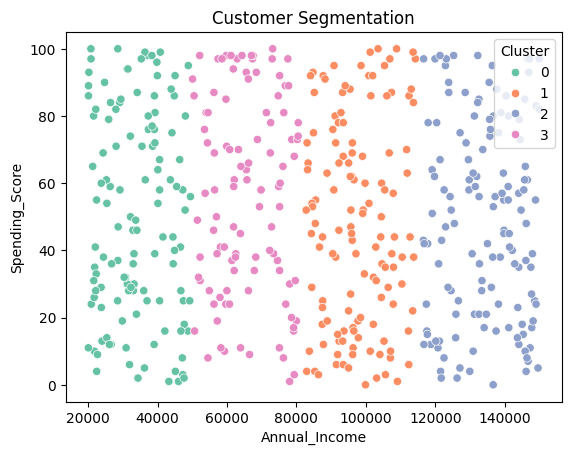

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Annual_Income', 'Spending_Score']])

sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.show()

## Task 8: Time-Based Analysis

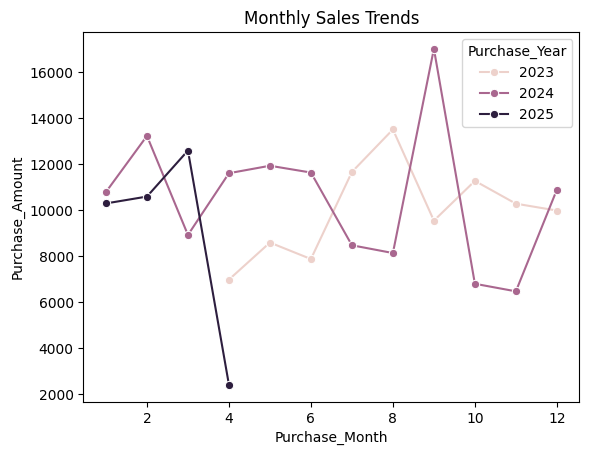

In [ ]:
df['Purchase_Month'] = df['Purchase_Date'].dt.month
df['Purchase_Year'] = df['Purchase_Date'].dt.year

monthly_trend = df.groupby(['Purchase_Year', 'Purchase_Month'])['Purchase_Amount'].sum().reset_index()

sns.lineplot(x='Purchase_Month', y='Purchase_Amount', hue='Purchase_Year', data=monthly_trend, marker='o')
plt.title("Monthly Sales Trends")
plt.show()

## Task 9: Customer Behavior Analysis

In [ ]:

# Task 9: Customer Behavior Analysis
top_customers = df.groupby('Customer_ID')['Purchase_Amount'].sum().nlargest(5)
print("Top 5 Spending Customers:\n", top_customers)

# Get the most purchased category from the one-hot encoded columns
# Assuming the original categories were 'Electronics', 'Clothing', 'Home Decor'
# Adjust these based on your actual categories
most_purchased_col = df[['Category_Purchased_Electronics', 'Category_Purchased_Clothing', 'Category_Purchased_Home Decor']].sum().idxmax()
most_purchased = most_purchased_col.split('_')[-1]  # Extract the category name

print("Most Purchased Category:", most_purchased_col)


membership_spending = df.groupby('Membership_Status')['Purchase_Amount'].mean()
print("Spending by Membership Status:\n", membership_spending)

Top 5 Spending Customers:
 Customer_ID
CUST0249    999.42
CUST0118    996.37
CUST0401    994.20
CUST0423    992.56
CUST0449    992.24
Name: Purchase_Amount, dtype: float64
Most Purchased Category: Category_Purchased_Home Decor
Spending by Membership Status:
 Membership_Status
Basic       509.450917
Gold        530.961885
Platinum    484.023803
Silver      490.553362
Name: Purchase_Amount, dtype: float64


## Task 10: Generate Automated EDA Report

In [ ]:
profile = ProfileReport(df, title="Customer Purchase Dataset EDA", explorative=True)
profile.to_file("EDA_Report.html")
files.download("EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:00<00:00, 55.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>